# Artificial and Computational Intelligence Assignment 1

| S.No. | Name | BITS ID | Contribution Percentage |
| -------| ---- | ------- | ----------------------- |
| 1. | Vipin Indoria | 2021FC04245 | 100 |
| 2. | Rahul Kant Tripathy | 2021FC04539 | 100 |
| 3. | Anuroop Bisaria | 2021FC04237 | 100 |
| 4. | Maneesh Kumar Shrivastava | Please add | 100 |

## Rescue Agent



**Background:**  
Group of peoples were trapped in Kangaroo Island due to sudden Bush Fire. Given below is the picture of a forest as a grid. Due to heavy Bush Fire some of the paths for main entrance are blocked. They are in the position to reach main entrance quickly because of fast spreading of fire. You have a rescue agent to help you find the shortest, quickest and safest route through the
available paths avoiding the blockades so that you can reach main entrance safely. You are provided with the map of the forest with the current situation marked. Use the following algorithms to find the safest path.

1. Breadth First Search and  
2. Recursive Best First Search

**Note:**  
No diagonal movements allowed. You cannot pass through river and fire affected area. 10 points to be added when your path passes to adjacent for every fire block. 5 points to be reduced when your path passes to river block. For every transition +3 should be added as step cost. The path which passes through minimum number of squares and minimum points is the shortest and safest path. Squared Euclidian distance can be considered as heuristic value.

## 1.	Define the Environment 

PEAS stands for “Performance Environment Actuator Sensor”. It is used to specify the setting for an intelligent agent design. PEAS is a type of model on which an AI agent works upon.

* P -> Performance -> It judges the performance of an agent.
* E -> Environment -> Real environment where the agent works. It basically consists of all the things under which the agents work.
* A -> Actuator -> Output of the agent. They are tools or equipments to perform an action.
* S -> Sensor -> Input to the agent. They are tools or equipments that capture the state of the environment.

#### Performance Measures:

1. Safety of Group of People
2. Finding Route Adjacent to River
3. Minimize Distance to Main Entrance
4. Correct Categorization of Fire, Water and Safe Passage

#### Environment

1. Group of People
2. Kangaroo Island
3. Fire
4. River
5. Routes

#### Actuator

1. Arm, Legs & Joint Angle Motors of Rescue Agent
2. Signal for Various Categories i.e. Fire, Water & Safe Route
3. Speakers

#### Sensors

1. MWIR infrared (IR) Cameras
2. Proximity sensor
3. Speedometer
4. GPS
5. Temperature
6. Camera

### Given Problem, Assumptions & Derivations

Below is the given layout of the landscape of Kangaroo Island with Routes and Obstacles i.e. Fire & Water.
![title](docs/ra.png)

From above image we can see that Group of People shown in 4 blocks and main entrance gate in 3 blocks. In order to create enviroemnt matrix we have taken few assumptions as below-

1. Family is in single square block
2. Main entrance is in one square block

Since as per given rules in note i.e. every step in green box counts for +3 weight, every step adjacent to fire block counts for +10 weights and every step adjacent to river block counts for -5 weights. We can not trverse through fire & river i.e. obstacle blocks. We can not traverse through diagonaly as well. Now from this few examples i.e.

* row=0, column=0 - this block is green block and adjacent to 1 fire and 1 water block, hence total weight = +3 + 10 - 5 = 8
* row=0, column=1 and row=1, column=0 - these blocks are water and fire respectively, hence obstacle so total weight = 0
* row=1, column=4 - this block is green block and adjacent to 2 fire block, hence total weight = +3 + 10 + 10 = 23
* row=3, column=1 - this block is green block and adjacent to 1 water block, hence total weight = +3 - 5 = -2
* row=5, column=6 - this block is green block and adjacent to 1 fire block, hence total weight = +3 + 10 = 13

Now using above derivations we can calculate the complete enviroment matrix.

In [1]:
# Import required libraries
from collections import deque

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

**Set Initial State (Must handle dynamic inputs)**

In [2]:
class Point:
    '''
    Define the initial state of group of people and main entrance dynamically. Constructor of this class takes the
    coordinates i.e. row and column indexof these states and returns a Point object as state object.
    
    Parameters:
    x (int): row number for the given state
    y (int): column number for the given state
  
    Returns:
    None 
    '''

    def __init__(self, x = 0, y = 0):
        '''Class constructor with default coordinates as (0,0)'''
        self.x = x
        self.y = y

    def __repr__(self):
        '''Display the state coordinates'''
        return f'(x,y): ({self.x},{self.y})'

    def __add__(self, other):
        '''Successor function for state transition which adds current state coordinates with given other coordinates
        Parameters:
            other (Point): point coordinates of other state
        
        Returns:
            Point: point coordinates of successor state
        '''
        return Point(self.x + other.x, self.y + other.y)

    def __eq__(self, other):
        '''Goal test function to check if two states are same by comparing the coordinates
        Parameters:
            other (Point): point coordinates of other state
        
        Returns:
            Boolean: true or false
        '''
        return self.x == other.x and self.y == other.y

**Set the matrix for transition & cost (as relevant for the given problem)**

In [3]:
# Transition & Cost matrix based on problem statement - 
def get_enviornment_matrix():
    #Fire= -1, River= 0, Path= 1
    landscape_matrix = [[ 1, 0, -1, -1, 1, 1, -1 ], 
                        [ -1, 0, -1, 1, 1, 1, 1 ],
                        [ 1, 0, 1, 1, -1, 1, -1 ],
                        [ 1, 0, 0, 0, 0, 1, 1 ],
                        [ 1, 1, -1, 1, 1, 1, -1 ],
                        [ 1, 1, 1, 1, -1, 1, 1 ],
                        [ 1, 1, -1, 1, 1, 1, 1 ]]
    
    cost_matrix = [[ 8, 0, 0, 0, 13, 13, 0 ],
                   [ 0, 0, 0, 23, 13, 3, 23 ],
                   [ 8, 0, 3, 8, 0, 23, 0 ],
                   [ -2, 0, 0, 0, 0, -2, 23 ],
                   [ 3, 8, 0, 8, 8, 13, 0 ],
                   [ 3, 3, 23, 13, 0, 13, 13 ],
                   [ 3, 13, 0, 13, 13, 3, 3 ]]
    return landscape_matrix, cost_matrix

**Write function to design the Transition Model/Successor function. Ideally this would be called while search algorithms are implemented**

This function is part on `Point` class implementation with defination `def __add__(self, other):`

**Write fucntion to handle goal test (Must handle dynamic inputs). Ideally this would be called while search algorithms are implemented**

This function is part on `Point` class implementation with defination `def __eq__(self, other):`

**Common Utility Methods**

In [4]:
class CommonUtility:
    '''
    This class implements the common utility methods required to help in designing the algorithm functions.
    '''
    
    def __init__(self, row_size=0, column_size=0):
        '''Class constructor which creates the utility class object for a given environment matrix with given number
        of rows and columns and movements vectors.'''
        self.rows = row_size
        self.columns = column_size
        
        # (row,column) numbers of 4 neighbours of a given cell
        # movements - up (-1,0), down (1, 0), left (0, -1) and right (0, 1)
        self.row_movements = [-1, 0, 0, 1]
        self.column_movements = [0, -1, 1, 0]
    
    def is_valid(self, row: int, col: int):
        '''
        Check weather a successor i.e. given cell is valid or not by verifying the cell coordinates.
        Parameters:
            row (int): row index of successor state
            col (int): column index of successor state
        
        Returns:
            Boolean: true and false
        '''
        return (row >= 0) and (row < self.rows) and (col >= 0) and (col < self.columns)
    
    def get_row_num(self, idx: int):
        '''
        Get the row number for the neighbouring cell of given current cell
        Parameters:
            idx (int): index of row movement vector
        Returns:
            (int): row movement value
        '''
        return self.row_movements[idx]
    
    def get_column_num(self, idx: int):
        '''
        Get the column number for the neighbouring cell of given current cell
        Parameters:
            idx (int): index of column movement vector
        Returns:
            (int): column movement value
        '''
        return self.column_movements[idx]
    
    def plot_path_matrix(self, landscape_matrix, path):
        '''
        This function will print the landscape matrix with path.
        Parameters:
            lanscape_matrix (List[List[int]]): Landscape matrix
            path (QueueNode[Point[int, int]]): Path from soource to destination
        Returns:
            None
        '''
        # Update matrix with rescue route path Route= 2
        for cell in path:
            point = cell.pt
            r, c = point.x, point.y
            landscape_matrix[r][c] = 2
        # orange=Fire, blue=River, green=Path, Gray=Route
        colors = ['orange', 'blue', 'green', 'gray']
        labels = ["Fire", "River", "Path", "Rescue Route"]
        cmap = ListedColormap(colors, name='colors', N=None)
        plt.figure(figsize = (8,8))
        # create a patch (proxy artist) for every color 
        patches = [ mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels)) ]
        # put those patched as legend-handles into the legend
        plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.grid(True)
        plt.imshow(landscape_matrix, cmap=cmap)
        plt.show()
        
    def print_path(self, path):
        '''
        This function will print the path from source to destination.
        Parameters:
            path (QueueNode[Point[int, int]]): Path from soource to destination
        Returns:
            None
        '''
        for cell in path:
            print(f"Cell Coordinates {cell.pt} and Cummulative distance from Source: {cell.dist}")

## 2. Definition of Algorithm 1  (UNINFORMED SEARCH - BREADTH FIRST SEARCH)

### Uninformed Search

Based on the available information about the problem, the Search Algorithm is first categorized into Uninformed Search Algorithm, which generates the search tree without any domain-specific knowledge or additional information about the states beyond the information provided in the problem definitions. This class-purpose search algorithm, which is also known as Blind Search or Brute-Force Search, operates in a brute-force way and examines each root node of the search tree until it achieves the goal state.

#### Requirements of Uninformed Search:
Though Uninformed Search does not require excessive details about the problem, it does have a few search requirements, like:

* **State Description:** States that are reachable from the initial state by any sequence of actions as well as details like where the search begins, ends, transition model, etc.  
* **A valid set of Operations:** That helps find the most optimal solution with the lowest cost.  
* **Initial State:** Information about the stage where the agent first starts the search.  
* **Goal State Description:** Details like the limit of the search tree, the sequence of nodes from start to goal, etc. should be considered.  

#### Components Included in Uninformed Search:
In Uninformed Search Algorithms, each of the six search strategies covers the following components, which becomes helpful at a different stage of problem-solving. These components are:

* **Problem Graph:** Contains the start and goal nodes.  
* **Strategy:** Describes the manner in which the graph will get to the goal.  
* **Fringe:** Includes the data structure used to store all the possible states that can be achieved from the current state.  
* **Tree:** It is the result of traversing from the start node to the goal node.  
* **Solution Plan:** This is the sequence of nodes from the start to the goal node.  

### Breadth-First Search
The most common search strategy, breadth-first search, starts from the root node, explores the neighboring nodes first and moves towards the next level. Implemented using the First-in First-out (FIFO) queue data structure, this is an example of a general-graph search algorithm that provides the shortest path to the solution.

The algorithm uses a queue to remember to get the next vertex to start a search as well as when a dead end occurs in any iteration. Without this queue, it won’t be able to identify and mark visited vertices and will process them again, which can then become a non-terminating process.  

In [5]:
class QueueNode:
    '''
    Keep track of the coordinate Point of the current cell and cell's distance from source cell.
    
    Parameters:
    pt (Point): current cell coordinates
    dist (int): airthmetic distance between cell and source state
  
    Returns:
        None 
    '''
    def __init__(self, pt: Point, dist: int):
        '''Constructor of the QueueNode class'''
        self.pt = pt
        self.dist = dist

In [6]:
class BreadthFirstSearch:
    '''Breadth-First Search Algorithm'''
    
    def __init__(self, mat, src: Point, dest: Point):
        '''
        Initialize the environment matrix, source cell and destination cell coordinates.
    
        Parameters:
            mat (list(list)): matrix having enviroment information defining each cell as weights
            src (Point): source cell coordinates
            dest (Point): destination cell coordinates

        Returns:
            distance, number of cells traversed
        '''        
        self.mat = mat
        self.src = src
        self.dest = dest
        
    def run_BFS(self):
        '''Main function to run the breadth first search algorithm.'''
        no_rows = len(self.mat)
        no_columns = len(self.mat[0])
        
        # Initialize space & time complexity
        # Here we assume that 1 operation takes 1 unit time and 1 node takes 1 unit space
        time_complexity, space_complexity = 0, 0
        
        # create CommonUtility class object
        cu = CommonUtility(no_rows, no_columns)
        
        # check source and destination cell of the matrix have valid coordinates inside landscape
        if not cu.is_valid(self.src.x, self.src.y) or not cu.is_valid(self.dest.x, self.dest.y):
            return -1, f"Please Check, Source {self.src} or Destination {self.dest} Coordinates are not Valid."
        
        # check source and destination cell of the matrix have value not equal to 0 i.e. not a obstacle cell
        if self.mat[self.src.x][self.src.y]==0 or self.mat[self.dest.x][self.dest.y]==0:
            return -1, f"Please Check, Source {self.src} or Destination {self.dest} Coordinates are on Obstacle."
        
        # create a matrix of visited & non visited cells marked as True & False i.e. closed list
        visited = [[False for i in range(no_columns)] for j in range(no_rows)]

        # mark the source cell as visited
        visited[self.src.x][self.src.y] = True

        # create a queue for BFS i.e. open list
        q = deque()
        
        # distance of source cell is 0
        s = QueueNode(self.src,0)
        
        # Path vector to store the current path
        path = []
        path.append(s)

        # enqueue source cell
        q.append(path.copy())

        # do a BFS starting from source cell
        while q:
            # Iterating through the nodes stored in queue, hence increase time complexity by 1 count and space complexity by 1
            time_complexity = time_complexity + 1
            space_complexity = space_complexity + 1
            
            # dequeue the front cell
            path = q.popleft()
            curr = path[len(path) - 1]

            # if we have reached the destination cell, we are done i.e. Goal Test
            pt = curr.pt
            if pt == self.dest:
                return (curr.dist, path, (time_complexity, space_complexity)), "Path Exists between Source & Destination."
            
            # otherwise enqueue its adjacent cells
            for i in range(4):
                # Traversing to each edge of given node, hence increase time complexity by 1 count
                time_complexity = time_complexity + 1
                
                # successor function for state transition
                successor = pt + Point(cu.get_row_num(i), cu.get_column_num(i))
                row = successor.x
                col = successor.y


                # if adjacent cell is valid, has path and not visited yet, enqueue it
                if (cu.is_valid(row, col) and self.mat[row][col] != 0 and not visited[row][col]):
                    visited[row][col] = True
                    # path computation
                    new_path = path.copy()
                    adjacent_cell = QueueNode(Point(row, col), curr.dist + self.mat[row][col])
                    new_path.append(adjacent_cell)
                    q.append(new_path)
        
        # Return -1 if destination cannot be reached for cost & path
        return (None, None,(time_complexity, space_complexity)), f"Path doesn't exists between Source {self.src} & Destination {self.dest}."

## 3. Definition of Algorithm 2 (INFORMED SEARCH - Recursive Best First Search)

# Recursive Best First Search

Recursive best-first search is a simple recursive algorithm that improves upon heuristic search by reducing the memory requirement. RBFS uses only linear space and it attempts to mimic the operation of standard best-first search. Its structure is similar to recursive depth-first search but it doesn't continue indefinitely down the current path, the f_limit variable is used to keep track of the f-value of the best alternative path available from any ancestor of the current node. RBFS remembers the f-value of the best leaf in the forgotten subtree and can decide whether it is worth re-expanding the tree later.
However, RBFS still suffers from excessive node regeneration.

In [40]:
# each block will have its own position and cost of steps taken
class Node:
    def __init__(self, pos: Point, cost):
        self.pos = pos
        self.cost = cost
        

def create_node(x, y, c):
    val = Point(x, y)
    return Node(val, c + 1)

#RBFS alorithm for rescue agent
def RBFS(Grid, dest, source):
    adj_cell_x = [1, 0, 0, -1]
    adj_cell_y = [0, 1, -1, 0]
    m, n = (len(Grid), len(Grid))
    visited_blocks = [[False for i in range(m)]
               for j in range(n)]
    visited_blocks[source.x][source.y] = True
    stack = deque()
    sol = Node(source, 0)
    stack.append(sol)
    neigh = 4
    neighbours = []
    cost = 0
    while stack:
        current_block = stack.pop()
        current_pos = current_block.pos
        print(current_pos , f"Distance from Source: {cost}")
        if current_pos.x == dest.x and current_pos.y == dest.y:
            print("\nPath Exists between Source & Destination.")
            print("\nTotal Cost from Source to Destination = ", cost)
            return current_block.cost
        x_pos = current_pos.x
        y_pos = current_pos.y
     
        for i in range(neigh):
            if x_pos == len(Grid) - 1 and adj_cell_x[i] == 1:
                x_pos = current_pos.x
                y_pos = current_pos.y + adj_cell_y[i]
            if y_pos == 0 and adj_cell_y[i] == -1:
                x_pos = current_pos.x + adj_cell_x[i]
                y_pos = current_pos.y
            else:
                x_pos = current_pos.x + adj_cell_x[i]
                y_pos = current_pos.y + adj_cell_y[i]
            if x_pos != 7 and x_pos != -1 and y_pos != 7 and y_pos != -1:
                if Grid[x_pos][y_pos] == 1:
                    if not visited_blocks[x_pos][y_pos]:
                        cost += 1
                        visited_blocks[x_pos][y_pos] = True
                        stack.append(create_node(x_pos, y_pos, current_block.cost))
    return  -1        


## Dynamic Input

In [8]:
# Function & call to get inputs (start/end state)
def get_state_inputs():
    '''
    This function reads dynamic inputs for the start/end state.
    
    Parameters:
        None
    
    Returns:
        source (Point): Point(x, y) coordinates of source state
        dest (Point): Point(p, q) coordinates of destination state
    '''
    x = int(input("Enter x co-ordinate of start node:"))
    y = int(input("Enter y co-ordinate of start node:"))
    p = int(input("Enter x co-ordinate of destination node:"))
    q = int(input("Enter y co-ordinate of destination node:"))
    
    source = Point(x, y)
    dest = Point(p, q)
    
    return source, dest

## 4. Calling the search algorithms

**Invoke algorithm 1 (Should Print the solution, path, cost etc., (As mentioned in the problem))**

Enter x co-ordinate of start node:6
Enter y co-ordinate of start node:6
Enter x co-ordinate of destination node:2
Enter y co-ordinate of destination node:0

Path Exists between Source & Destination.

Path from Source (x,y): (6,6) to Destination (x,y): (2,0) is having 11 square block and route is given as -
Cell Coordinates (x,y): (6,6) and Cummulative distance from Source: 0
Cell Coordinates (x,y): (6,5) and Cummulative distance from Source: 3
Cell Coordinates (x,y): (6,4) and Cummulative distance from Source: 16
Cell Coordinates (x,y): (6,3) and Cummulative distance from Source: 29
Cell Coordinates (x,y): (5,3) and Cummulative distance from Source: 42
Cell Coordinates (x,y): (5,2) and Cummulative distance from Source: 65
Cell Coordinates (x,y): (5,1) and Cummulative distance from Source: 68
Cell Coordinates (x,y): (4,1) and Cummulative distance from Source: 76
Cell Coordinates (x,y): (4,0) and Cummulative distance from Source: 79
Cell Coordinates (x,y): (3,0) and Cummulative distance 

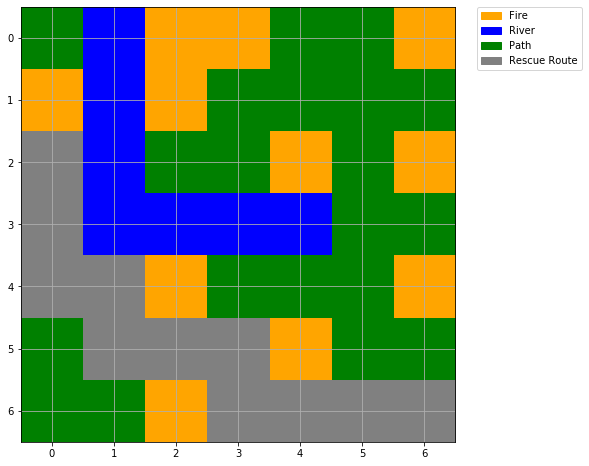


Cost from Source (x,y): (6,6) to Destination (x,y): (2,0)= 85

Space Complexity to store Nodes O(|V|) is 30 Unit.
Time Complexity  to Iterate through Nodes + Edges O(|V+E|) is 146 Unit.


In [9]:
landscape_matrix, cost_matrix = get_enviornment_matrix()
source, dest = get_state_inputs()
bfs = BreadthFirstSearch(cost_matrix, source, dest)
result, message = bfs.run_BFS()

if result!=-1:
    if result[0] is not None or result[1] is not None: 
        cu_obj = CommonUtility()
        print(f"\n{message}")
        print(f"\nPath from Source {source} to Destination {dest} is having {len(result[1])} square block and route is given as -")
        cu_obj.print_path(result[1])
        print("\nVisual representation of landscape with path - ")
        cu_obj.plot_path_matrix(landscape_matrix, result[1])
        print(f"\nCost from Source {source} to Destination {dest}= {result[0]}")
        print(f"\nSpace Complexity to store Nodes O(|V|) is {result[2][1]} Unit.") 
        print(f"Time Complexity  to Iterate through Nodes + Edges O(|V+E|) is {result[2][0]} Unit.")
    else:
        print(f"\n{message}")
        print(f"\nSpace Complexity to store Nodes O(|V|) is {result[2][1]} Unit.")
        print(f"Time Complexity to Iterate through Nodes + Edges O(|V+E|) is {result[2][0]} Unit.")
elif result:
    print(f"\n{message}")

**Invoke algorithm 2 (Should Print the solution, path, cost etc., (As mentioned in the problem))**

In [41]:
landscape_matrix, cost_matrix = get_enviornment_matrix()
source, dest = get_state_inputs()
result2 = RBFS(landscape_matrix, dest, source)
if result2 != -1:
    print("Steps with backtracking = ", result2)
else:
    print("Path does not exit")

Enter x co-ordinate of start node:6
Enter y co-ordinate of start node:6
Enter x co-ordinate of destination node:2
Enter y co-ordinate of destination node:0
(x,y): (6,6) Distance from Source: 0
(x,y): (5,6) Distance from Source: 2
(x,y): (5,5) Distance from Source: 3
(x,y): (4,5) Distance from Source: 4
(x,y): (3,5) Distance from Source: 6
(x,y): (2,5) Distance from Source: 8
(x,y): (1,5) Distance from Source: 9
(x,y): (0,5) Distance from Source: 12
(x,y): (0,4) Distance from Source: 13
(x,y): (1,4) Distance from Source: 13
(x,y): (1,3) Distance from Source: 14
(x,y): (2,3) Distance from Source: 15
(x,y): (2,2) Distance from Source: 16
(x,y): (1,6) Distance from Source: 16
(x,y): (3,6) Distance from Source: 16
(x,y): (4,4) Distance from Source: 16
(x,y): (4,3) Distance from Source: 17
(x,y): (5,3) Distance from Source: 18
(x,y): (5,2) Distance from Source: 20
(x,y): (5,1) Distance from Source: 21
(x,y): (4,1) Distance from Source: 24
(x,y): (4,0) Distance from Source: 25
(x,y): (3,0) Di

## 5. Comparitive Analysis

**Print the Time & Space complexity of algorithm 1 - Breadth First Search**

In [12]:
print(f"\nSpace Complexity to store Nodes O(|V|) is {result[2][1]} Unit.") 
print(f"Time Complexity  to Iterate through Nodes + Edges O(|V+E|) is {result[2][0]} Unit.")


Space Complexity to store Nodes O(|V|) is 30 Unit.
Time Complexity  to Iterate through Nodes + Edges O(|V+E|) is 146 Unit.


**Print the Time & Space complexity of algorithm 2 - Recursive Best First Search**

## 6. Provide your comparitive analysis or findings in no more than 3 lines in below section

As per the Above two algorithms used for finding the best possible route to Rescue peoples. 
BFS (Breadth First Search) always returns the solution that is closest to the root, which means that if the cost of each edge is the same for all edges, BFS returns the best solution.

RBFS (Recursive Best First Search), It expands fronteir nodes in best-first order. It uses the problem specific information about the enviroment to determine the preference of one node over the other
